In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_df = pd.read_csv('../datasets/movie_lens/movies.csv.gz')
movies_df

,item_id,title
0,70,Toy Story (1995)
1,1103,Jumanji (1995)
2,1017,Grumpier Old Men (1995)
3,4270,Waiting to Exhale (1995)
4,1858,Father of the Bride Part II (1995)
...,...,...
62418,56883,We (2018)
62419,56741,Window of the Soul (2001)
62420,22208,Bad Poems (2018)
62421,56884,A Girl Thing (2001)


In [3]:
ratings_df = pd.read_csv('../datasets/movie_lens/ratings.csv.gz')
ratings_df

,user_id,item_id,rating,timestamp
0,0,0,5.0,1147880044
1,0,1,3.5,1147868817
2,0,2,5.0,1147868828
3,0,3,5.0,1147878820
4,0,4,3.5,1147868510
...,...,...,...,...
25000090,162540,544,4.5,1240953372
25000091,162540,4574,2.5,1240951998
25000092,162540,7115,2.0,1240950697
25000093,162540,578,4.0,1240953434


In [4]:
ratings_df['rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

In [5]:
tags_df = pd.read_csv('../datasets/movie_lens/tags.csv.gz')
tags_df

,user_id,item_id,tag,timestamp
0,2,76,classic,1439472355
1,2,76,sci-fi,1439472256
2,3,283,dark comedy,1573943598
3,3,283,great dialogue,1573943604
4,3,863,so bad it's good,1573943455
...,...,...,...,...
1093355,162520,2119,Neil Patrick Harris,1427311611
1093356,162520,894,cornetto trilogy,1427311259
1093357,162533,42788,comedy,1527518175
1093358,162533,42788,disabled,1527518181


In [6]:
links_df = pd.read_csv('../datasets/movie_lens/links.csv.gz')
links_df 

,item_id,imdb_id,tmdb_id
0,70,114709,862.0
1,1103,113497,8844.0
2,1017,113228,15602.0
3,4270,114885,31357.0
4,1858,113041,11862.0
...,...,...,...
62418,56883,6671244,499546.0
62419,56741,297986,63407.0
62420,22208,6755366,553036.0
62421,56884,249603,162892.0


In [7]:
genome_tags_df = pd.read_csv('../datasets/movie_lens/genome_tags.csv.gz')
genome_tags_df

,tag_id,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [8]:
genome_scores_df = pd.read_csv('../datasets/movie_lens/genome_scores.csv.gz')
genome_scores_df.head()   

,item_id,tag_id,relevance
0,70,1,0.02875
1,70,2,0.02375
2,70,3,0.06250
3,70,4,0.07575
4,70,5,0.14075


In [9]:
ratings_df.describe()

,user_id,item_id,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118828e+04,2.393114e+03,3.533854e+00,1.215601e+09
std,4.679172e+04,4.043222e+03,1.060744e+00,2.268758e+08
min,0.000000e+00,0.000000e+00,5.000000e-01,7.896520e+08
25%,4.050900e+04,4.270000e+02,3.000000e+00,1.011747e+09
50%,8.091300e+04,1.146000e+03,3.500000e+00,1.198868e+09
75%,1.215560e+05,2.628000e+03,4.000000e+00,1.447205e+09
max,1.625400e+05,5.904600e+04,5.000000e+00,1.574328e+09


In [10]:
users_ratings = ratings_df.groupby('user_id').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean'),
    # rating_std=('rating', 'std'),
    rating_var=('rating', 'var')
)
users_ratings.head()

,rating_count,rating_mean,rating_var
user_id,,,
0,70,3.814286,1.008489
1,184,3.630435,2.124970
2,656,3.697409,0.359825
3,242,3.378099,1.247527
4,101,3.752475,0.868119


<AxesSubplot:>

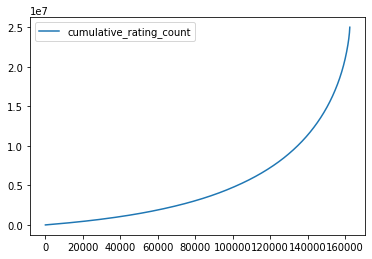

In [11]:
sorted = users_ratings.sort_values(by='rating_count')
sorted['cumulative_rating_count'] = sorted['rating_count'].cumsum()
sorted.reset_index(inplace=True)
sorted
sorted.plot.line(y='cumulative_rating_count')

In [12]:
# group_by_num_ratings['total_ratings'] = group_by_num_ratings['count'] * group_by_num_ratings['mean']
# variances and means are uncorelated, and the users that we aggregate have the same amount of ratings
# therefore we can aggregate their mean and variance
group_by_num_ratings = users_ratings.groupby('rating_count').agg(
    group_size=('rating_count', 'size'),
    group_rating_mean=('rating_mean', 'mean'),
    group_rating_var=('rating_var', 'mean')
)
group_by_num_ratings.reset_index(inplace=True)
group_by_num_ratings['total_ratings'] = group_by_num_ratings['group_size'] * group_by_num_ratings['rating_count']
group_by_num_ratings
# group_by_num_ratings.head()
# user_ratings_groups = pd.cut(users_ratings['count'], bins=10)
# user_ratings_groups.head()

,rating_count,group_size,group_rating_mean,group_rating_var,total_ratings
0,20,4611,3.494725,1.071707,92220
1,21,3406,3.647296,1.013071,71526
2,22,3112,3.691290,0.976272,68464
3,23,2916,3.694370,1.005792,67068
4,24,2599,3.711179,0.992743,62376
...,...,...,...,...,...
2114,7488,1,3.208868,0.898602,7488
2115,7919,1,2.580124,1.118200,7919
2116,8913,1,3.184001,0.272300,8913
2117,9178,1,3.280290,0.313796,9178


<AxesSubplot:xlabel='rating_count'>

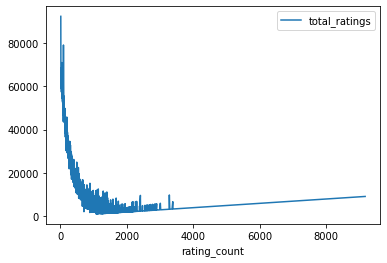

In [13]:
# group_by_num_ratings.describe()
limit_to_max_1000_ratings = group_by_num_ratings.where(group_by_num_ratings['rating_count'] < 10000)
limit_to_max_1000_ratings['cumulative_total_ratings'] = limit_to_max_1000_ratings['total_ratings'].cumsum()
limit_to_max_1000_ratings['cumulative_group_size'] = limit_to_max_1000_ratings['group_size'].cumsum()
# limit_to_max_1000_ratings['cumulative_total_ratings_sqrt'] = limit_to_max_1000_ratings['cumulative_total_ratings']
# group_by_num_ratings['cumulative_total_ratings']
limit_to_max_1000_ratings.plot.line(x='rating_count', y =['total_ratings'])